In [130]:
import krp_ngram as k
#import sentencepiece as spm
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import networkx as nx
import pandas as pd
import codecs
from collections import Counter
from collections import defaultdict
from operator import itemgetter
import numpy as np
import community

In [ ]:
#for n in range(2,6):
#    k.make_ngram_lists(n=n)

In [ ]:
import re
line="䷀乾下乾上《乾》元亨，利貞。(初九)、/潛龍勿用。九二：見龍在田，利見大人。九三：君子終日乾乾，夕惕若厲。无咎。九四：或躍在淵，无咎。九五：飛龍在天，利見大人。上九：亢龍，有悔。用九：見群龍无首，吉。《彖》曰：大哉「乾元」，萬物資始，乃統天。雲行雨施，品物流形。大明終始，六位時成。時乘六龍以御天。乾道變化，各正性命。保合大和，乃「利貞」。首出庶物，萬國咸寧。《象》曰：天行健，君子以自強不息。「潛龍勿用」、陽在下也。「見龍在田」、德施普也。「終日乾乾」、反復道也。「或躍在淵」、進「无咎」也。「飛龍在天」、「大人」造也。「亢龍有悔」、盈不可久也。「用九」、天德不可為首也。《文言》曰：「元」者、善之長也，「亨」者、嘉之會也，《利》者、義之和也，「貞」者、事之幹也。君子體仁足以長人，嘉會足以合禮，利物足以和義，貞固足以幹事。君子行此四德者，故曰「乾、元、亨、利、貞」。初九曰、「潛龍勿用」，何謂也？子曰：「龍、德而隱者也。不易乎世，不成乎名，遯世无悶，不見是而无悶。樂則行之，憂則違之，確乎其不可拔，潛龍也。」九二曰、「見龍在田、利見大人」，何謂也？子曰：「龍德而正中者也。庸言之信，庸行之謹，閑邪存其誠，善世而不伐，德博而化。《易》曰、『見龍在田、利見大人』，君德也。」九三曰、「君子終日乾乾、夕惕若、厲、无咎」。何謂也？子曰：「君子進德脩業，忠信，所以進德也，脩辭立其誠，所以居業也。知至至之，可與幾也，知終終之，可與存義也。是故居上位而不驕，在下位而不憂，故乾乾因其時而惕，雖危无咎矣。」九四曰、「或躍在淵、无咎。」何謂也？子曰：「上下无常，非為邪也。進退无恆，非離群也。君子進德脩業、欲及時也，故无咎。」九五曰、「飛龍在天、利見大人」。何謂也？子曰：「同聲相應，同氣相求。水流濕，火就燥，雲從龍，風從虎，聖人作而萬物覩。本乎天者親上，本乎地者親下，則各從其類也。」上九曰、「亢龍有悔」，何謂也？子曰：「貴而无位，高而无民，賢人在下位而无輔，是以動而有悔也。」「潛龍勿用」、下也，「見龍在田」、時舍也，「終日乾乾」、行事也，「或躍在淵」、自試也，「飛龍在天」、上治也，「亢龍有悔」、窮之災也。乾元「用九」、天下治也。「潛龍勿用」，陽氣潛藏。「見龍在田」，天下文明。「終日乾乾」，與時偕行。「或躍在淵」，乾道乃革。「飛龍在天」，乃位乎天德。「亢龍有悔」，與時偕極。乾元「用九」，乃見天則。《乾》「元」"
line = re.sub(r"[\u3000-\u3fff\uff00-\uffff()/]", "", line)
n=3
d=defaultdict(int)
for i in range(len(line) - n):
    ng=line[i:i+n]
    d[ng] +=1

len(d)
print(line)

In [ ]:
mv=k.loadvoc("n2-KR1a.vocab")

In [ ]:
mv[0]

In [ ]:
vl=k.loadvocs(use_krp_names=False)

In [ ]:
av=k.agg_voclist(vl[1], md=vl[0], w="pos")

In [ ]:
len(av["君子"])

In [ ]:
av["俱歸"]

In [145]:
if 1:
    flags=["n2", "n3", "n4", "n5"]
    labels={"None" : "Count", "score" : "Comb.prop", "pos" : "Position"}
    limits=[(50,40), (25, 15), (3,1)]
    weights=[None, 'score', 'pos']
    of=codecs.open("nreport1.txt", "w", "utf-8")
    reps=[]
    cnt=0
    for flag in flags:
        for up, lo in limits:
            for w in weights:
                res=report(flag, up, lo, w)
                if w is None:
                    w="None"
                flx=(flag, up, lo, w)
                #print(flx)
                ofh=codecs.open("nrep/%s-%3.3d-%3.3d-%s.html" % flx, "w", "utf-8")
                ofh.write("""<html><head>
  <meta http-equiv="Content-Type" content="text/html;charset=utf-8" />
  </head><body><h1>Result for calculation %d</h1>
                <p>Parameters: Ngram:%s, limits: %d,%d, Combination: %s</p>
                <table>\n""" % (cnt, flag, up, lo, labels[w]))
                ofh.write("<tr><th>部類</th><th>Self/Other</th><th>Most related部類</th></tr>")
                reps.append((flx, res))
                cnt += 1
                if w is None:
                    info = "flag:%s,up:%d,lo:%d,score:None" % (flag, up, lo)
                else:
                    info = "flag:%s,up:%d,lo:%d,score:%s" % (flag, up, lo, w)
                of.write("====\n%s\n\n" % (info))    
                kr=list(res.keys())
                kr.sort()
                bu=defaultdict(list)
                bldict={}
                for r in kr:
                    s = r[0:3]
                    c = Counter([a[0][0:3] for a in res[r]])
                    other = sum([a[1] for a in c.items() if a[0] != s])
                    bu[s].append((c[s], other))
                    bldict[r] = "%2.2d / %2.2d" % (c[s], other)
                for r in kr:
                    rvx = evd[r]
                    rx=[]
                    for a in res[r]:
                        if a[0] in rvx:
                            rtmp="<b>%s:%s</b>" % (a[0], k.krp_names[a[0]])
                        else:
                            rtmp="%s:%s" % (a[0], k.krp_names[a[0]])
                        rx.append(rtmp)
                    # should integrate the following table here!
                    #rx=["%s:%s" % (a[0], k.krp_names[a[0]]) for a in res[r]]
                    #ofh.write("%s\t%s\t%s\t%s\n" % (r, k.krp_names[r], bldict[r], ",".join(rx[0:5])))
                    ofh.write("<tr><td>%s %s</td><td>%s</td><td>%s</td></tr>\n" % (r, k.krp_names[r], bldict[r], ",".join(rx)))
                #of.write("\n==Self/other\n")
                ofh.write("</table></body></html>")
                ofh.close()
                of.write("\n==s/o, bu\n")
                bs=list(bu.keys())
                bs.sort()
                for b in bs:
                    of.write("%s\t%d\t%d\t%s\n" % (b, sum([a[0] for a in bu[b]]), sum([a[1] for a in bu[b]]), info))
    of.close() 


In [2]:
def report(flag, up=40, lo=10, w=None, cutoff=10):
    ms,mv = k.loadvocs(flag=flag, use_krp_names=False)
    vx = k.agg_voclist(mv, w=w)
    v2 = k.red_voclist(vx, up=up, lo=lo)
    sx = k.vocmatrix(v2, size=len(mv), vsize=len(mv[0]), w=w)
    res = k.evalvocmatrix(sx, ms, cutoff=cutoff)
    return res

In [117]:
bud=defaultdict(lambda: defaultdict(list))
#bus=defaultdict(list)
for fl, res in reps:
    key="%s-%3.3d-%3.3d-%s.html" % fl
    #key = "%d/%d:%s" % fl[1:]
    k1 = fl[0]
    rk=list(res.keys())
    rk.sort()
    bu=defaultdict(list)
    for r in rk:
        s = r[0:3]
        c = Counter([a[0][0:3] for a in res[r]])
        other = sum([a[1] for a in c.items()]) - c[s]
        bu[s].append((c[s], other))
    bs=list(bu.keys())
    bs.sort()
    for b in bs:
        bud[b][k1].append((key, sum([a[0] for a in bu[b]]), 
                                 sum([a[1] for a in bu[b]])))
        #bus[b].append((key, sum([a[0] for a in bu[b]]), sum([a[1] for a in bu[b]])))
    
    #print (rk)

In [133]:
bus=[]
for fl, res in reps:
    key="%s-%3.3d-%3.3d-%s" % fl
    #key = "%d/%d:%s" % fl[1:]
    k1 = fl[0]
    rk=list(evd.keys())
    rk.sort()
    evsum = 0
    for r in rk:
        rl = [a[0] for a in res[r][:3]]
        for a in rl:
            if r in ek:
                if a in evd[r]:
                    evsum +=  (10 - rl.index(a))
                    #print(key, a, rl.index(a))
    bus.append((key, evsum))


In [139]:
com=defaultdict(list)
for resx in reps:
    res=resx[1]
    name="%s-%3.3d-%3.3d-%s" % resx[0]
    #res=reps[6][1]
    o=[]
    G = nx.Graph()
    for r in res:
        for s in res[r]:
            o.append((r, s[0], s[1]))
    G.add_weighted_edges_from(o)
    for g in G.nodes:
        G.nodes[g]['label']=k.krp_names[g]
    G.graph["name"] = name
    nx.write_gexf(G, "nrep/%s-%3.3d-%3.3d-%s.gexf" % resx[0])
    partition = community.best_partition(G)
    size = float(len(set(partition.values())))
    plist = defaultdict(list)
    [plist[a[1]].append(a[0]) for a in partition.items()]
    com[name].append(len(plist))
    ofh=codecs.open("nrep/%s-%3.3d-%3.3d-%s-comm.html" % resx[0], "w", "utf-8")
    ofh.write("""<html><head>
  <meta http-equiv="Content-Type" content="text/html;charset=utf-8" />
  </head><body>""")
    ofh.write("# Parameters: %s %d/%d %s\n" % (resx[0]))
    ofh.write("# Communities: %d\n" % (len(plist)))
    ofh.write("<table><tr><th>No</th><th>Size</th><th>Members</th></tr>")
    for pl in plist:
        pll=plist[pl]
        pll.sort()
        pll=["%s %s" % (a, k.krp_names[a]) for a in pll]
        ofh.write("<tr><td>%d</td><td>%d</td><td>%s</td></tr>\n" % (pl, len(pll), ",".join(pll)))
    ofh.write("</table></body></html>\n")
    ofh.close()


In [143]:
flag="n2"
labels={"m2" : "3万", "m5" : "2万", "m7" : "1.5万", "m9" : "1万", 
        "None" : "Count", "score" : "Comb.prop", "pos" : "Position"}
ms, mv = k.loadvocs(flag=flag,  use_krp_names=False)
bcnt= Counter([a[0:3] for a in ms if len(a) == 4])
ofh=codecs.open("nrep/sp-self-other-results.html", "w", "utf-8")
ofh.write("""<html><head>
  <meta http-equiv="Content-Type" content="text/html;charset=utf-8" />
  </head><body>""")
ofh.write("<h1>Ngram calculation results</h1>")
ofh.write("<h2>Evaluation against <a href='../eval.txt'>standard</a></h2><table>")
ofh.write("<tr><th>N</th><th>Comb.</th><th>上/下</th><th>Score</th><th>Comm.</th></tr>")
st = sorted(bus, key=lambda x : x[1], reverse=True)
for s in st:
    ss=tuple(map(int, s[0].split('-')[1:3]))
    nxx=s[0].split("-")[0]
    w=s[0].split("-")[3].split(".")[0]
    try:
        ccnt = com[s[0]][0]
    except:
        ccnt = 0
    ofh.write("<tr><td>%s</td><td>%s</td><td>%d/%d</td><td><a href='%s.html'>%d</a></td><td><a href='%s-comm.html'>%d</a></td></tr>\n" % (nxx, labels[w], ss[0], ss[1], s[0], s[1], s[0], ccnt))
ofh.write("</table>")
ofh.write("<h2>Self(=same 部) / Other (=other 部) results</h2>")
ofh.write("<p>Results for different values of the upper and lower limits (上下) and vocabulary size (3万, 2万).</p>")
ofh.write("<p>For all subcategories 部類 in a category 部, for the 10 most similar subcategories, a same/other calculation is performed, the maximal score is thus 10 times the number of the subcategories for a given category.</p>")
th2 = "<th>n2</th><th>n3</th><th>n4</th><th>n5</th>"
bk=list(bud.keys())
bk.sort()
for bx in bk:
    ofh.write("<h3>%s %s (%d部類)</h3>" % (bx, k.krp_names[bx], bcnt[bx]))
    flags = list(bud[bx].keys())
    flags.sort()
    ofh.write("<table border='1'><caption>Results for %s</caption>" % bx )
    ofh.write("<tr><th>Limit</th><th colspan='4'>Count</th><th colspan='4'>Prob.</th><th colspan='4'>Pos</th></tr>")
    ofh.write("<tr><th>上下</th>%s%s%s</tr>" % (th2, th2, th2))
    rp1 = bud[bx][flags[0]]
    rp2 = bud[bx][flags[1]]
    ofh.write ("<tr>")
    for i, p in enumerate(rp1):
        if (i % 3 == 0):
            ss=tuple(map(int, p[0].split('-')[1:3]))
            ofh.write("</tr><tr><td>%d/%d</td>" % (ss))
        val = (p[1] / sum(p[1:])) * 100
        ofh.write ("<td><a href='%s'>%2.2f</a></td>\n" % (p[0], val))
        for fx in flags[1:]:
            #print( bud[bx][fx][i])
            px=bud[bx][fx][i]
            val = (px[1] / sum(px[1:])) * 100
            ofh.write ("<td><a href='%s'>%2.2f</a></td>\n" % (px[0], val))
    ofh.write ("</tr>")
    ofh.write("</table>")
ofh.write("</body></html>")
ofh.close()


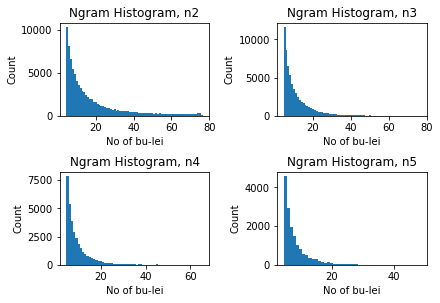

In [121]:
flags=["n2", "n3", "n4", "n5"]
cnt=220
for flag in flags:
    ms, mv = k.loadvocs(flag=flag, use_krp_names=False)
    vx = k.agg_voclist(mv)
    vsize = len(mv[0])
    labels, values = zip(*Counter([len(a[1]) for a in vx.items()]).items())
    cut=5
    width=1
    cnt += 1
    plt.subplot(cnt)
    plt.title("Ngram Histogram, %s" % (flag))
    plt.ylabel("Count")
    plt.xlabel("No of bu-lei")
    indexes = np.arange(cut, len(labels))
    plt.bar(indexes, values[cut:], width)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.6,
                    wspace=0.45)    
plt.savefig("ngram-hist-%s.png" % (vsize))
plt.show()


In [104]:
pd = {1:3,2:5,3:6}
vt="eval.txt"
evd=defaultdict(list)
for line in codecs.open(vt, "r", "utf-8"):
    l=line[:-1].split("\t")
    bl = l[0].split()[0]
    for bx in l[1].split(","):
        if ":" in bx:
            evd[bl].append(bx.split(":")[0])
mxv = sum([pd[len(evd[a])] for a in evd]) 
mx2 = sum([len(evd[a]) * 10 for a in evd]) 

In [112]:
bud=defaultdict(lambda: defaultdict(list))
bus=[]
for fl, res in reps:
    key="%s-%3.3d-%3.3d-%s" % fl
    #key = "%d/%d:%s" % fl[1:]
    k1 = fl[0]
    rk=list(evd.keys())
    rk.sort()
    evsum = 0
    for r in rk:
        rl = [a[0] for a in res[r][:3]]
        for a in rl:
            if r in ek:
                if a in evd[r]:
                    evsum +=  (10 - rl.index(a))
                    print(key, a, rl.index(a))
    bus.append((key, evsum))


n2-050-040-None.html KR2o 2
n2-050-040-None.html KR2d 2
n2-050-040-None.html KR4d 2
n2-050-040-None.html KR4e 2
n2-050-040-None.html KR4d 1
n2-050-040-None.html KR6b 2
n2-050-040-None.html KR6r 1
n2-050-040-score.html KR2o 2
n2-050-040-score.html KR2d 2
n2-050-040-score.html KR4d 2
n2-050-040-score.html KR4e 2
n2-050-040-score.html KR4d 1
n2-050-040-score.html KR6b 2
n2-050-040-score.html KR6r 1
n2-050-040-pos.html KR2o 2
n2-050-040-pos.html KR2d 2
n2-050-040-pos.html KR4d 2
n2-050-040-pos.html KR4e 1
n2-050-040-pos.html KR4d 1
n2-050-040-pos.html KR4e 2
n2-050-040-pos.html KR6b 0
n2-050-040-pos.html KR6n 1
n2-050-040-pos.html KR6r 0
n2-025-015-None.html KR2o 0
n2-025-015-None.html KR1d 2
n2-025-015-None.html KR2d 1
n2-025-015-None.html KR2b 2
n2-025-015-None.html KR2a 0
n2-025-015-None.html KR2m 0
n2-025-015-None.html KR2l 2
n2-025-015-None.html KR3g 0
n2-025-015-None.html KR4e 0
n2-025-015-None.html KR4d 0
n2-025-015-None.html KR4f 2
n2-025-015-None.html KR4e 0
n2-025-015-None.html K

In [110]:
sorted(bus, key=lambda x : x[1], reverse=True)

[('n2-003-001-None.html', 213),
 ('n2-003-001-score.html', 212),
 ('n3-003-001-None.html', 205),
 ('n3-003-001-score.html', 205),
 ('n2-003-001-pos.html', 195),
 ('n3-003-001-pos.html', 187),
 ('n4-003-001-None.html', 171),
 ('n4-003-001-score.html', 171),
 ('n4-003-001-pos.html', 170),
 ('n5-003-001-None.html', 158),
 ('n5-003-001-score.html', 158),
 ('n5-003-001-pos.html', 150),
 ('n2-025-015-None.html', 138),
 ('n2-025-015-score.html', 138),
 ('n2-025-015-pos.html', 135),
 ('n2-050-040-pos.html', 79),
 ('n5-025-015-pos.html', 60),
 ('n3-025-015-pos.html', 59),
 ('n2-050-040-None.html', 58),
 ('n2-050-040-score.html', 58),
 ('n5-050-040-pos.html', 45),
 ('n3-025-015-None.html', 42),
 ('n3-025-015-score.html', 42),
 ('n5-050-040-None.html', 42),
 ('n4-025-015-pos.html', 40),
 ('n5-025-015-None.html', 37),
 ('n5-025-015-score.html', 37),
 ('n3-050-040-None.html', 26),
 ('n3-050-040-score.html', 26),
 ('n4-025-015-None.html', 26),
 ('n4-025-015-score.html', 26),
 ('n5-050-040-score.html

In [119]:
bud

defaultdict(<function __main__.<lambda>>,
            {'KR1': defaultdict(list,
                         {'n2': [('n2-050-040-None.html', 17, 83),
                           ('n2-050-040-score.html', 17, 83),
                           ('n2-050-040-pos.html', 26, 74),
                           ('n2-025-015-None.html', 48, 52),
                           ('n2-025-015-score.html', 48, 52),
                           ('n2-025-015-pos.html', 55, 45),
                           ('n2-003-001-None.html', 61, 39),
                           ('n2-003-001-score.html', 60, 40),
                           ('n2-003-001-pos.html', 58, 42)],
                          'n3': [('n3-050-040-None.html', 5, 95),
                           ('n3-050-040-score.html', 5, 95),
                           ('n3-050-040-pos.html', 12, 88),
                           ('n3-025-015-None.html', 22, 78),
                           ('n3-025-015-score.html', 22, 78),
                           ('n3-025-015-pos.html', 30,

In [71]:
c = Counter([a[0][0:3] for a in res[r]])

In [72]:
c

Counter({'KR6': 10})

In [84]:
r="KR1a"
ek = list(evd.keys())
rl = [a[0] for a in res[r]]
for a in rl:
    if r in ek:
        if a in evd[r]:
            print (a, 10 - rl.index(a))

KR3g 5


In [80]:
evd[r]

['KR3g']

In [111]:
rl

['KR6r', 'KR6j', 'KR6d']